In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import string

from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop = stopwords.words('english')
from nltk.util import ngrams

from wordcloud import WordCloud
from transformers import pipeline

In [12]:
df = pd.read_csv('COVID-19_Vaccine.csv')

In [15]:
# Remove punctuation and lower
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

df['ArticleText'] = df['ArticleText'].apply(lambda x : remove_punct(x.lower()))
df['ArticleText'] = df['ArticleText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

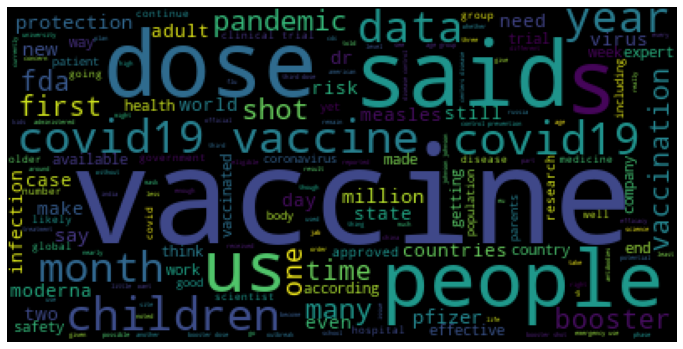

In [17]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12, 8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(df['ArticleText']))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [19]:
question_answering = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad (https://huggingface.co/distilbert-base-cased-distilled-squad)


In [28]:
question = "Who produces the vaccine for covid ?"

In [21]:
context = " ".join(df['ArticleText'])

In [29]:
result = question_answering(question=question, context=context)

In [30]:
print("Answer:", result['answer'])
print("Score:", result['score'])

Answer: pfizer moderna
Score: 0.7849324345588684
